In [ ]:
import numpy as np

In [ ]:
# def cross_entropy(y, y_pred):
#   return -1*(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

def cross_entropy(y, y_pred):
  if y==1:
    return -np.log(y_pred)
  else:
    return -np.log(1-y_pred)

In [ ]:
cross_entropy(1, 0.000000001)

20.72326583694641

In [ ]:
# classification
# binary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['accuracy'])

# multiclass
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy'])


In [ ]:
# regression
model.compile(loss='mean_squared_error'optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='mse'optimizer='adam', metrics=['mae'])

model.compile(loss='mean_absolute_error'optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='mae'optimizer='adam', metrics=['mae'])

model.compile(loss='mean_squared_logarithmic_error'optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='msle'optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
insurance = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
insurance_dummy

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
X = insurance_dummy.drop(columns=['charges'])
y = insurance_dummy['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# (x - x.mean()) / x.std()
# mean of 0, std/variance of 1

scaler = MinMaxScaler()
# (x - x.min()) / (x.max() - x.min()) -> 0 - 1

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_scaled.shape

(1070, 8)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=50)

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 344643823.3043 - mse: 344643823.3043 - mae: 13939.9178 - val_loss: 323397120.0000 - val_mse: 323397120.0000 - val_mae: 12967.3428
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 313710828.5217 - mse: 313710828.5217 - mae: 13336.6228 - val_loss: 323352640.0000 - val_mse: 323352640.0000 - val_mae: 12965.8379
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 309775643.8261 - mse: 309775643.8261 - mae: 13079.1553 - val_loss: 323264160.0000 - val_mse: 323264160.0000 - val_mae: 12962.8750
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 302353680.0000 - mse: 302353680.0000 - mae: 13027.4917 - val_loss: 323096032.0000 - val_mse: 323096032.0000 - val_mae: 12957.2441
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 330664531.4783 - mse: 330664531.4783 - mae: 13459.3080 - val_loss: 322800992.0000 - val_mse: 322800992.0000 - val_

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=1000, batch_size=50)

Epoch 1/1000
22/22 [==============================] - 1s 11ms/step - loss: 13178.0582 - mse: 313412595.4783 - mae: 13178.0585 - val_loss: 12967.2959 - val_mse: 323398400.0000 - val_mae: 12967.2959
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 13478.8411 - mse: 324824265.7391 - mae: 13478.8411 - val_loss: 12965.6338 - val_mse: 323351104.0000 - val_mae: 12965.6338
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 13368.5890 - mse: 325448388.1739 - mae: 13368.5890 - val_loss: 12962.2119 - val_mse: 323253120.0000 - val_mae: 12962.2119
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 13464.0510 - mse: 322805765.5652 - mae: 13464.0509 - val_loss: 12955.4795 - val_mse: 323058368.0000 - val_mae: 12955.4795
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 12887.5833 - mse: 299714703.3043 - mae: 12887.5833 - val_loss: 12943.5713 - val_mse: 322710688.0000 - val_mae: 12943.5713
Epoch 6/1000
22/22 

In [ ]:
df = pd.DataFrame(history.history)

In [ ]:
df.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,13345.624023,322439136.0,13345.624023,12967.295898,323398400.0,12967.295898
1,13344.383789,322403488.0,13344.383789,12965.633789,323351104.0,12965.633789
2,13342.002930,322333760.0,13342.002930,12962.211914,323253120.0,12962.211914
3,13337.179688,322192576.0,13337.178711,12955.479492,323058368.0,12955.479492
4,13328.152344,321922048.0,13328.152344,12943.571289,322710688.0,12943.571289


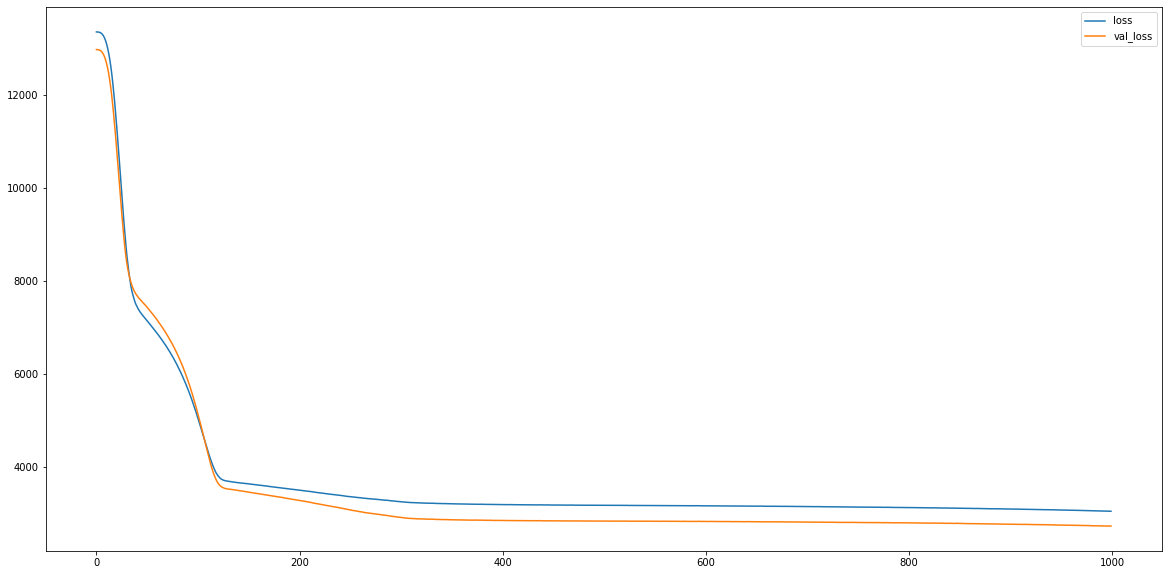

In [ ]:
df[['loss', 'val_loss']].plot(figsize=(20,10))

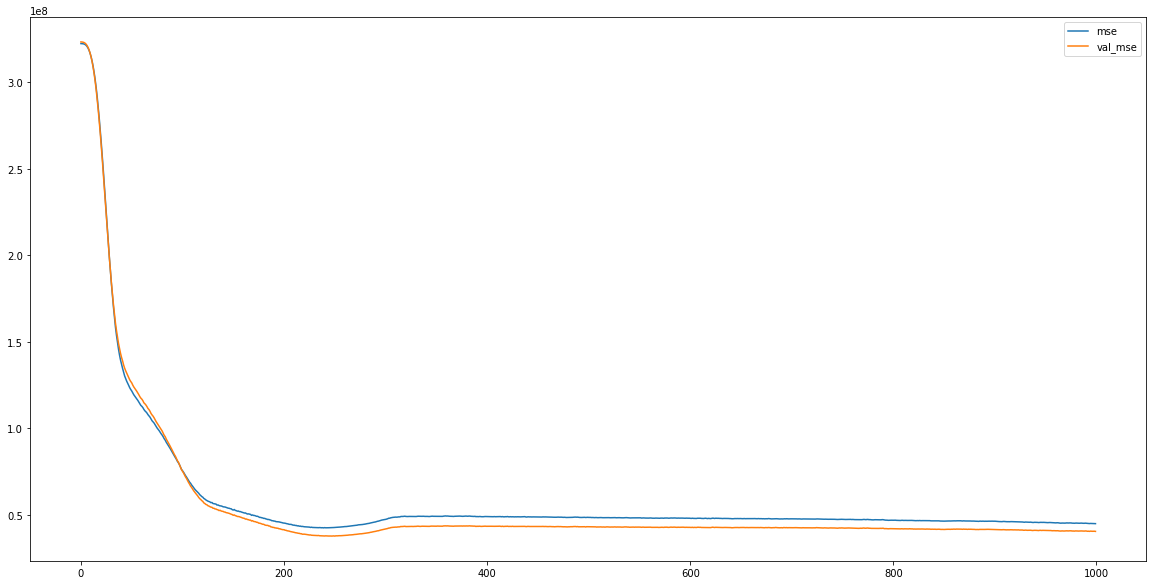

In [ ]:
df[['mse', 'val_mse']].plot(figsize=(20,10))

In [ ]:
def build_model(loss='mae', optimizer='adam'):
  model = Sequential()
  model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])

  return model

In [ ]:
model = build_model(loss='msle')

In [ ]:
model.fit(X_train_scaled, y_train, epochs=250, batch_size=50)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 83.4003 - mse: 331848516.1739 - mae: 13496.4242
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 77.4184 - mse: 346701305.7391 - mae: 13876.4098
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 69.5902 - mse: 333033220.1739 - mae: 13516.9916
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 61.0286 - mse: 316638429.2174 - mae: 13129.2117
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 54.4803 - mse: 319150814.6087 - mae: 13347.9696
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 48.5116 - mse: 329471858.0870 - mae: 13438.2182
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 43.1662 - mse: 308304877.9130 - mae: 12906.1962
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 39.5126 - mse: 332806381.9130 - mae: 13511.7770
Epoch 9/250
22/22 [=============

In [ ]:
results = model.evaluate(X_test_scaled, y_test, verbose=0)

In [ ]:
# loss, metric_1, metric_2
results[0], results[1], results[2]

(0.6572898626327515, 145453696.0, 7642.9453125)

In [ ]:
predictions = model.predict(X_test_scaled)

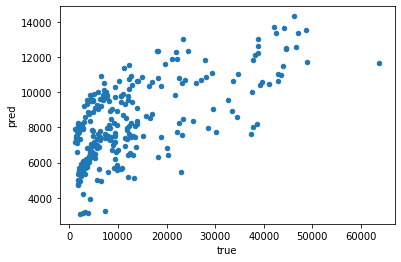

In [ ]:
df = pd.DataFrame({'true': y_test, 'pred': predictions.flatten()})
df.plot(x='true', y='pred', kind='scatter')

In [ ]:
from sklearn.metrics import r2_score

r2_score(df['true'], df['pred'])

0.06309254856232893

In [ ]:
predictions.flatten()

array([ 5670.931 ,  6482.6885, 11107.229 , 10297.281 , 10646.252 ,
        9616.023 ,  4967.774 , 10654.248 ,  3121.127 , 10667.998 ,
       12319.668 ,  9796.223 ,  6380.5586, 14320.044 , 13566.373 ,
       13658.212 ,  8939.932 , 11044.317 ,  7318.6416,  9827.064 ,
        9876.702 , 10012.982 ,  7399.0723,  4191.441 ,  8730.726 ,
        5687.6577,  8236.27  ,  7474.107 ,  5883.738 ,  7201.6772,
        8668.336 ,  7877.956 ,  5724.381 ,  6990.4556,  8305.561 ,
        7555.3564,  5809.2783,  7373.601 , 10705.184 , 12243.83  ,
        7848.856 ,  8181.1963,  8542.377 ,  9555.683 ,  9484.459 ,
       10157.731 ,  6809.0815,  6929.7554, 13730.237 ,  9530.929 ,
        8375.9   ,  7657.8584,  7958.864 ,  5036.9365,  9791.723 ,
        8379.929 ,  5726.021 , 13051.176 ,  7986.787 ,  5663.055 ,
        8208.662 ,  7809.7876, 11838.764 ,  7537.807 ,  5450.6133,
        6239.6904, 12359.254 , 10551.596 ,  5838.699 ,  8162.3687,
        7458.2207,  6186.34  ,  7272.1016,  9632.711 ,  9797.0